In [98]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy

from sklearn.manifold import SpectralEmbedding

In [22]:
### Reading vote data for 118th Congress

'''
for i in range(1, 597):
    try:
        url = f'https://www.govtrack.us/congress/votes/118-2023/h{i}/export/csv'
        df = pd.read_csv(url)
        df.reset_index(inplace = True)
        df.rename(dict(zip(df.columns, ['id', 'state', 'district', 'vote', 'name', 'party'])), axis = 1, inplace = True)
        df.drop(['state', 'district'], axis = 1, inplace = True)
        df.to_csv(f'h{i}.csv', index=False)

    except FileNotFoundError:
        print(i)
        continue
'''

"\nfor i in range(1, 597):\n    try:\n        url = f'https://www.govtrack.us/congress/votes/118-2023/h{i}/export/csv'\n        df = pd.read_csv(url)\n        df.reset_index(inplace = True)\n        df.rename(dict(zip(df.columns, ['id', 'state', 'district', 'vote', 'name', 'party'])), axis = 1, inplace = True)\n        df.drop(['state', 'district'], axis = 1, inplace = True)\n        df.to_csv(f'h{i}.csv', index=False)\n\n    except FileNotFoundError:\n        print(i)\n        continue\n"

In [52]:
### Map representative ID to representative names

df = pd.read_csv('vote_data_118/h1.csv')
df.drop(0, inplace = True)
df['name'] = df['name'].str.removeprefix('Rep. ').str.replace(r' \[.*\]', '', regex = True)
reps = dict(zip(df['id'], df['name']))
adj_list_pos = dict(zip(df['name'], [*range(435)]))

In [90]:
adj_list = [[0 for i in range(436)] for j in range(436)]
for file in os.listdir('vote_data_118'):
    df = pd.read_csv('vote_data_118/' + file)

    y = df.index[df['vote'] == 'Yea'].tolist()
    n = df.index[df['vote'] == 'Nay'].tolist()

    for i in y:
        for j in y:
            if i == j:
                continue
            else:
                adj_list[i][j] += 1

    for i in n:
        for j in n:
            if i == j:
                continue
            else:
                adj_list[i][j] += 1

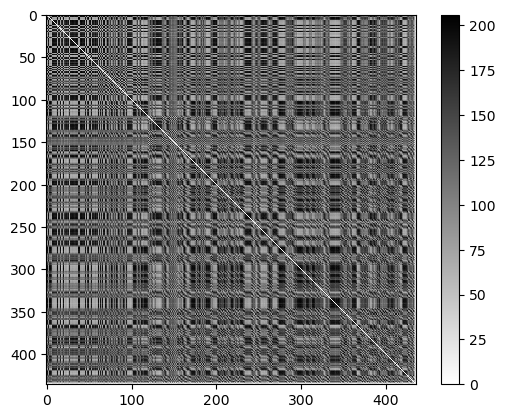

In [93]:
sparse_adj_list = scipy.sparse.csr_matrix(adj_list).todense()
plt.imshow(sparse_adj_list,interpolation='none',cmap='binary')
plt.colorbar()

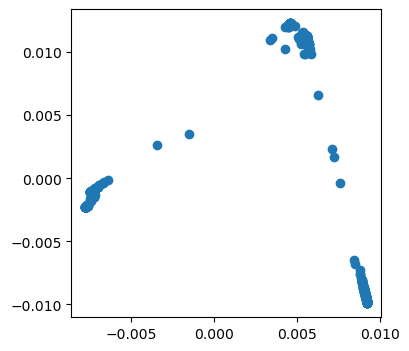

In [106]:
rep_embedding = SpectralEmbedding().fit_transform(X = np.asarray(adj_list))
plt.figure(figsize=(4, 4))
plt.scatter(rep_embedding[:, 0], rep_embedding[:, 1])